# Recommender Systems with Python

Welcome to the code notebook for Recommender Systems with Python. In this lecture we will develop basic recommendation systems using Python and pandas. There is another notebook: *Advanced Recommender Systems with Python*. That notebook goes into more detail with the same data set.

In this notebook, we will focus on providing a basic recommendation system by suggesting items that are most similar to a particular item, in this case, movies. Keep in mind, this is not a true robust recommendation system, to describe it more accurately,it just tells you what movies/items are most similar to your movie choice.

There is no project for this topic, instead you have the option to work through the advanced lecture version of this notebook (totally optional!).

Let's get started!

## Import Libraries

In [20]:
import numpy as np
import pandas as pd

## Get the Data

In [21]:
import pandas as pd

# Define column names for the main dataset
column_names = ['user_id', 'item_id', 'rating', 'timestamp']

# Load the MovieLens dataset
df = pd.read_csv('u.data', sep='\t', names=column_names)

# Load the movie titles dataset
movie_titles = pd.read_csv('movie_id_titles.csv')

# Preview the first few rows of each dataset
print(df.head())
print(movie_titles.head())

   user_id  item_id  rating  timestamp
0        0       50       5  881250949
1        0      172       5  881250949
2        0      133       1  881250949
3      196      242       3  881250949
4      186      302       3  891717742
   item_id              title
0        1   Toy Story (1995)
1        2   GoldenEye (1995)
2        3  Four Rooms (1995)
3        4  Get Shorty (1995)
4        5     Copycat (1995)


In [22]:
# Merge the datasets
df = pd.merge(df, movie_titles, on='item_id')

# Preview the updated dataframe
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


## EDA

Let's explore the data a bit and get a look at some of the best rated movies.

## Visualization Imports

In [23]:
# Check the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    100003 non-null  int64 
 1   item_id    100003 non-null  int64 
 2   rating     100003 non-null  int64 
 3   timestamp  100003 non-null  int64 
 4   title      100003 non-null  object
dtypes: int64(4), object(1)
memory usage: 3.8+ MB


In [24]:
# Summary statistics
df.describe()

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


In [25]:
# Calculate the average rating and number of ratings for each movie
ratings = df.groupby('title')['rating'].mean()
num_ratings = df.groupby('title')['rating'].count()

# Combine these into a single DataFrame
ratings_df = pd.DataFrame({'average_rating': ratings, 'num_ratings': num_ratings})

# Preview the top-rated movies
ratings_df.sort_values(by='average_rating', ascending=False)

,average_rating,num_ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


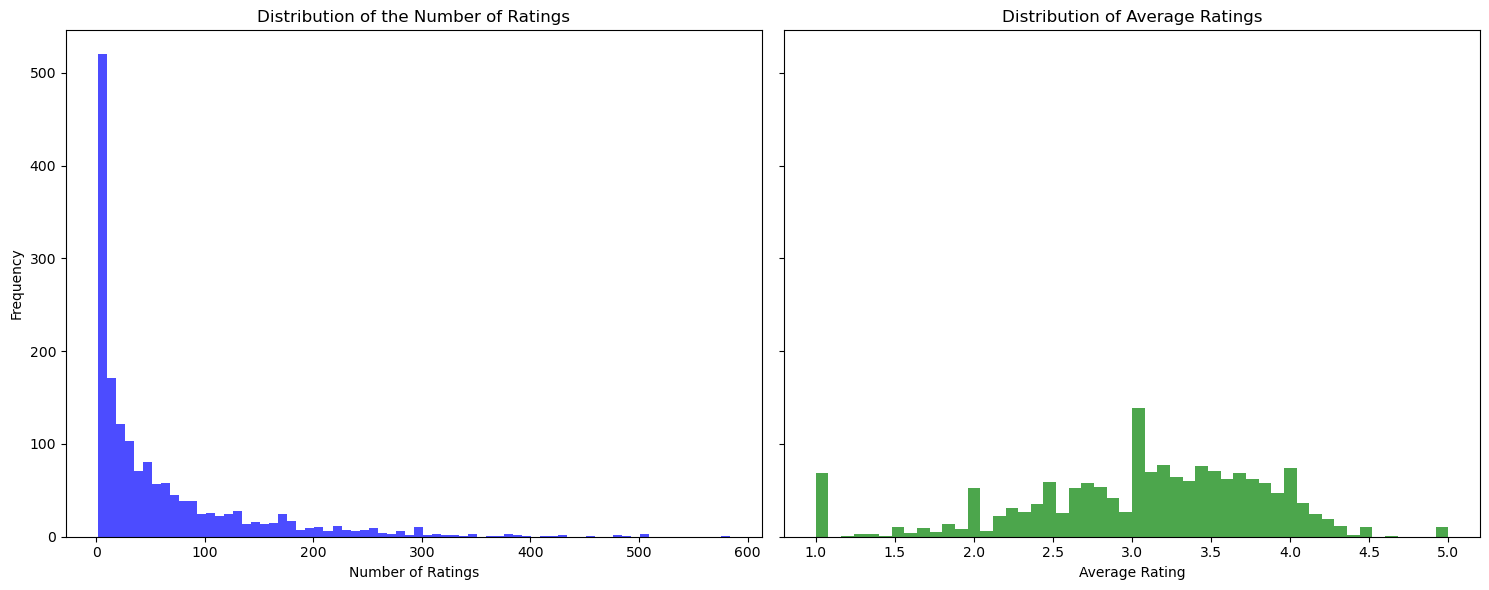

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for the two distributions
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Plot the distribution of the number of ratings
axes[0].hist(ratings_df['num_ratings'], bins=70, color='blue', alpha=0.7)
axes[0].set_title('Distribution of the Number of Ratings')
axes[0].set_xlabel('Number of Ratings')
axes[0].set_ylabel('Frequency')

# Plot the distribution of average ratings
axes[1].hist(ratings_df['average_rating'], bins=50, color='green', alpha=0.7)
axes[1].set_title('Distribution of Average Ratings')
axes[1].set_xlabel('Average Rating')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

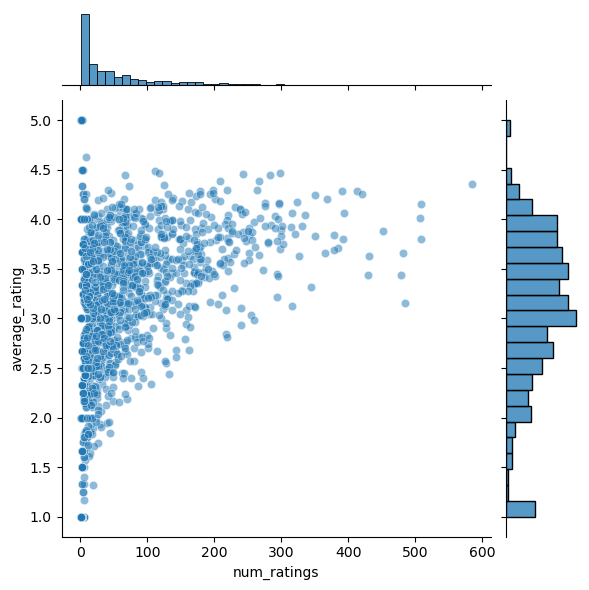

In [27]:
# Joint plot of average rating vs. number of ratings
sns.jointplot(x='num_ratings', y='average_rating', data=ratings_df, alpha=0.5)
plt.show()

In [28]:
# Create a user-movie rating matrix
movie_matrix = df.pivot_table(index='user_id', columns='title', values='rating')

# Preview the matrix
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Select user ratings for Star Wars (1977)
star_wars_ratings = movie_matrix['Star Wars (1977)']
star_wars_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [30]:
# Compute correlations with other movies
movie_correlations = movie_matrix.corrwith(star_wars_ratings)

# Convert the result to a DataFrame
correlation_df = pd.DataFrame(movie_correlations, columns=['correlation'])

# Drop NaN values
correlation_df.dropna(inplace=True)

# Preview the correlations
correlation_df.head()

c:\Users\hamin\anaconda3\envs\python_course\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\hamin\anaconda3\envs\python_course\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\hamin\anaconda3\envs\python_course\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\hamin\anaconda3\envs\python_course\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\hamin\anaconda3\envs\python_course\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [31]:
# Add the number of ratings to the correlation DataFrame
correlation_df = correlation_df.join(ratings_df['num_ratings'])

# Filter out movies with fewer than 100 ratings
filtered_recommendations = correlation_df[correlation_df['num_ratings'] > 100]

# Sort by correlation
filtered_recommendations = filtered_recommendations.sort_values(by='correlation', ascending=False)

# Preview the top recommendations
filtered_recommendations.head()

                                                    correlation  num_ratings
title                                                                       
Star Wars (1977)                                       1.000000          584
Empire Strikes Back, The (1980)                        0.748353          368
Return of the Jedi (1983)                              0.672556          507
Raiders of the Lost Ark (1981)                         0.536117          420
Austin Powers: International Man of Mystery (1997)     0.377433          130


## Improving Recommendations

Filter Movies with Insufficient Ratings

In [32]:
# Filter movies with fewer than 100 ratings
filtered_recommendations = correlation_df[correlation_df['num_ratings'] > 100]

# Sort by correlation
filtered_recommendations = filtered_recommendations.sort_values(by='correlation', ascending=False)

## Evaluating Recommendations

Metrics for Recommendation Systems

In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Example: Compute RMSE between predicted and actual ratings
predicted_ratings = [4.0, 3.5, 5.0, 3.0]
actual_ratings = [4.5, 3.0, 4.8, 3.2]

rmse = sqrt(mean_squared_error(actual_ratings, predicted_ratings))
rmse

0.38078865529319544

Visualizing Recommendations

Text(0.5, 1.0, 'Correlation Heatmap of Movies')

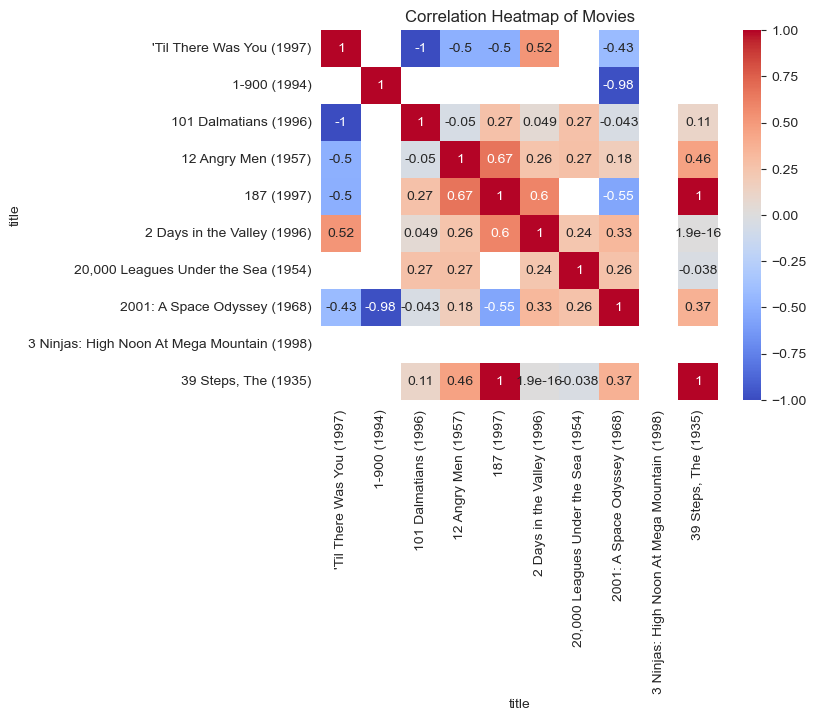

In [41]:
# Generate a heatmap of correlations
correlation_subset = movie_matrix.corr().iloc[:10, :10]  # Subset for clarity
sns.heatmap(correlation_subset, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Movies")